In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

p_root = "/home/colombelli/Documents/datasets/LUNG_TEST_NPN_TRUNC/"
df0_name = "tcga_intersect.csv"
df1_name = "cumida1_intersect.csv"
df2_name = "cumida2_intersect.csv"
df3_name = "cumida3_intersect.csv"

In [3]:
df0 = pd.read_csv(p_root+df0_name, index_col=0)
df1 = pd.read_csv(p_root+df1_name, index_col=0)
df2 = pd.read_csv(p_root+df2_name, index_col=0)
df3 = pd.read_csv(p_root+df3_name, index_col=0)

In [11]:
df1.iloc[:, 0:-1]

,SLITRK3,FGF16,CD19,VGLL4,ZMAT1,CHKA,PMS2L2,RFX3,ZNF432,NRF1,...,CDC42SE1,PLSCR4,C16orf78,ELSPBP1,DHX57,PTPN20B,ZNF837,ID1,SDHAF1,NOM1
samples,,,,,,,,,,,,,,,,,,,,,
6947,3.574109,3.743624,4.772829,8.670480,3.324456,5.985679,4.455361,3.782715,6.188313,4.999399,...,7.690784,6.872825,3.528477,4.259719,4.928686,3.042535,4.312232,9.751943,7.974483,6.059835
6949,3.684804,4.040255,4.243701,8.733316,3.216041,6.442419,4.291633,4.146949,6.089434,5.356057,...,7.415554,5.316908,3.457630,4.102812,4.747346,3.132282,4.125007,10.514957,8.636409,6.690608
6951,3.389567,3.610564,6.680483,8.620804,3.960858,6.082729,4.476783,3.644412,6.671948,5.011944,...,7.496399,7.277357,3.488624,4.122766,4.575833,3.194354,4.481002,8.575208,7.467583,5.521501
6952,3.404214,4.044981,4.741048,8.921545,3.391190,5.946028,5.507867,3.733219,6.666158,4.838961,...,7.755312,6.121860,3.656559,4.422056,4.798371,4.441058,4.611853,11.001575,7.531502,6.121772
6954,3.691665,3.716162,6.176678,9.061026,3.759470,6.488871,4.259146,3.433114,6.167154,4.737790,...,7.128235,7.568706,3.736974,4.238589,4.623976,3.524881,4.144173,11.529766,7.073406,5.793585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,3.563314,3.672377,4.566750,8.248865,3.727117,6.092817,3.757747,3.901798,6.264296,4.909798,...,7.006532,8.882948,3.632942,4.297013,4.392161,3.598880,4.289622,11.238803,7.375235,5.682429
7027,3.925604,3.604523,4.228457,8.207827,3.685053,6.380830,4.262210,3.877709,6.451421,5.091158,...,7.322101,9.043570,3.546231,4.419164,4.270752,3.329042,4.413182,11.646419,7.080343,6.032116
7033,3.628953,4.121859,4.547120,8.408278,3.810479,6.622229,4.284260,3.962603,6.598937,5.101948,...,7.383057,8.270626,3.769868,4.634654,4.652844,3.368186,4.188647,11.146776,7.150413,5.876506


In [21]:
df1_norm_vals = normalize(df1.iloc[:, 0:-1])
cols =  df1.iloc[:, 0:-1].columns
indexes = df1.iloc[:, 0:-1].index

In [25]:
df1_norm = pd.DataFrame(df1_norm_vals)
df1_norm.columns = cols
df1_norm.index = indexes
df1_norm['class'] = df1['class']
df1_norm

,SLITRK3,FGF16,CD19,VGLL4,ZMAT1,CHKA,PMS2L2,RFX3,ZNF432,NRF1,...,PLSCR4,C16orf78,ELSPBP1,DHX57,PTPN20B,ZNF837,ID1,SDHAF1,NOM1,class
samples,,,,,,,,,,,,,,,,,,,,,
6947,0.004428,0.004638,0.005913,0.010742,0.004119,0.007416,0.005520,0.004687,0.007667,0.006194,...,0.008515,0.004372,0.005278,0.006106,0.003770,0.005343,0.012082,0.009880,0.007508,1.0
6949,0.004622,0.005068,0.005323,0.010955,0.004034,0.008081,0.005383,0.005202,0.007639,0.006719,...,0.006669,0.004337,0.005147,0.005955,0.003929,0.005174,0.013190,0.010833,0.008393,1.0
6951,0.004261,0.004539,0.008398,0.010837,0.004979,0.007646,0.005627,0.004581,0.008387,0.006300,...,0.009148,0.004385,0.005182,0.005752,0.004015,0.005633,0.010779,0.009387,0.006941,1.0
6952,0.004205,0.004996,0.005856,0.011019,0.004189,0.007344,0.006803,0.004611,0.008234,0.005977,...,0.007561,0.004516,0.005462,0.005927,0.005485,0.005696,0.013588,0.009302,0.007561,1.0
6954,0.004603,0.004634,0.007702,0.011299,0.004688,0.008092,0.005311,0.004281,0.007690,0.005908,...,0.009438,0.004660,0.005285,0.005766,0.004396,0.005168,0.014378,0.008821,0.007225,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,0.004430,0.004565,0.005677,0.010254,0.004633,0.007574,0.004671,0.004850,0.007787,0.006104,...,0.011043,0.004516,0.005342,0.005460,0.004474,0.005333,0.013971,0.009168,0.007064,0.0
7027,0.004908,0.004506,0.005287,0.010262,0.004607,0.007977,0.005329,0.004848,0.008066,0.006365,...,0.011306,0.004434,0.005525,0.005339,0.004162,0.005517,0.014561,0.008852,0.007541,0.0
7033,0.004459,0.005064,0.005587,0.010331,0.004682,0.008136,0.005264,0.004869,0.008108,0.006268,...,0.010162,0.004632,0.005694,0.005717,0.004138,0.005146,0.013695,0.008785,0.007220,0.0


In [26]:
def normalize_df(df, save_path):
    
    df_norm_vals = normalize(df.iloc[:, 0:-1])
    cols =  df.iloc[:, 0:-1].columns
    indexes = df.iloc[:, 0:-1].index
    
    df_norm = pd.DataFrame(df_norm_vals)
    df_norm.columns = cols
    df_norm.index = indexes
    df_norm['class'] = df['class']
    
    df_norm.to_csv(save_path)
    print("Normalization completed for:", save_path)
    return

In [2]:
dfs = [df0,df1,df2,df3]
paths = [p_root+"tcga_normalized.csv",
         p_root+"cumida1_normalized.csv",
         p_root+"cumida2_normalized.csv",
         p_root+"cumida3_normalized.csv"]

In [28]:
for i, df in enumerate(dfs):
    normalize_df(df, paths[i])

Normalization completed for: /home/colombelli/Documents/datasets/LUNG_TEST_NPN_TRUNC/tcga_normalized.csv
Normalization completed for: /home/colombelli/Documents/datasets/LUNG_TEST_NPN_TRUNC/cumida1_normalized.csv
Normalization completed for: /home/colombelli/Documents/datasets/LUNG_TEST_NPN_TRUNC/cumida2_normalized.csv
Normalization completed for: /home/colombelli/Documents/datasets/LUNG_TEST_NPN_TRUNC/cumida3_normalized.csv


## Box-plotting normalized data

In [3]:
import seaborn as sns

def boxplot_df(df, include_outliers=True):
    x = sns.boxplot(data=df, showfliers = include_outliers)
    x.set(xticklabels=[])
    x.tick_params(bottom=False)
    x.set(xlabel=None)
    plt.show()
    return

def get_n_class(df, cls, n):
    selected = df.loc[df['class']==cls, :]
    selected = selected.sample(frac=1)
    try:
        return selected.iloc[:n, :]
    except:
        return selected

In [4]:
df0 = pd.read_csv(paths[0], index_col=0)
df1 = pd.read_csv(paths[1], index_col=0)
df2 = pd.read_csv(paths[2], index_col=0)
df3 = pd.read_csv(paths[3], index_col=0)


20 random samples each dataset:


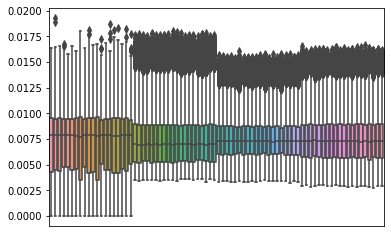


20 random NORMAL samples each dataset:


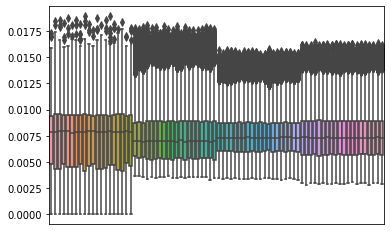


20 random TUMOR samples each dataset:


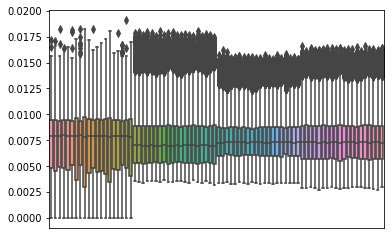

In [5]:
dfs = [df0,df1,df2,df3]

#ALL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    dfs20.append(df.iloc[0:20, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random samples each dataset:")
boxplot_df(dfConc)


#NORMAL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 0, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random NORMAL samples each dataset:")
boxplot_df(dfConc)


#TUMOR SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 1, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random TUMOR samples each dataset:")
boxplot_df(dfConc)

#### Without outliers 


20 random samples each dataset:


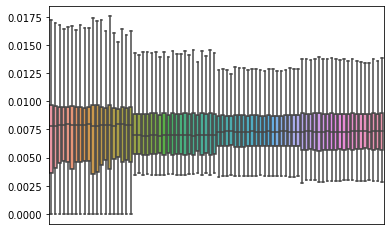


20 random NORMAL samples each dataset:


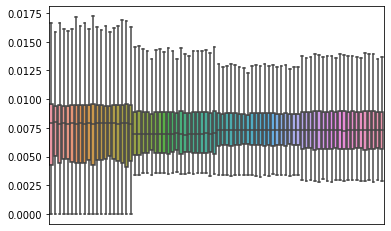


20 random TUMOR samples each dataset:


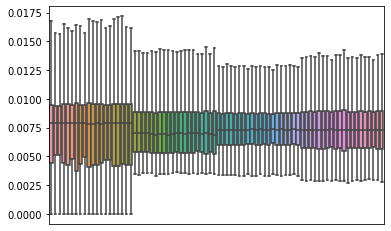

In [6]:
dfs = [df0,df1,df2,df3]

#ALL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    dfs20.append(df.iloc[0:20, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random samples each dataset:")
boxplot_df(dfConc, False)


#NORMAL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 0, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random NORMAL samples each dataset:")
boxplot_df(dfConc, False)


#TUMOR SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 1, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random TUMOR samples each dataset:")
boxplot_df(dfConc, False)

In [ ]:
dfs = [df0,df1,df2,df3]

#ALL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    dfs20.append(df.iloc[0:20, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random samples each dataset:")
boxplot_df(dfConc, False)


#NORMAL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 0, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random NORMAL samples each dataset:")
boxplot_df(dfConc, False)


#TUMOR SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 1, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random TUMOR samples each dataset:")
boxplot_df(dfConc, False)

## Cross-dataset test

In [9]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import metrics

def get_x(df):
    return df.loc[:, df.columns != 'class']
    
def get_y(df):
    return df.loc[:, ['class']].T.values[0]

def get_probs_positive_class(pred):
        positive_probs = []

        for prediction in pred:
            positive_probs.append(prediction[1])
        return positive_probs
    

def load_dataframes(train_path, test_path):
    train_df = pd.read_csv(train_path, index_col=0)
    test_df = pd.read_csv(test_path, index_col=0)
    return train_df, test_df


def cross_testing_accuracy(train_df, test_df, genes_ranking_path, thresholds, trained_clfs=None):
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    test_df = test_df.sample(frac=1)
    for i, threshold in enumerate(thresholds):
        print("Cross-testing with threshold:", threshold)
        ts_top = test_df.loc[:, genes[0:threshold]+['class']]

        if trained_clfs:
            clf = trained_clfs[i]
            
        else:
            clf = GBC()
            tr_top = train_df.loc[:, genes[0:threshold]+['class']]
            X_train = get_x(tr_top)
            y_train = get_y(tr_top)
            clf.fit(X_train, y_train)
        

        X_test = get_x(ts_top)
        y_test = get_y(ts_top)

        acc_score = clf.score(X_test, y_test)

        pred = clf.predict_proba(X_test)
        y_pred = np.argmax(pred, axis=1)
        pred = get_probs_positive_class(pred)

        roc_auc = metrics.roc_auc_score(np.array(y_test, dtype=int), pred)
        pred_accuracy = metrics.accuracy_score(y_test, y_pred)

        print("Accuracy with .score:", acc_score)
        print("Accuracy with .predict_proba:", pred_accuracy)
        print("ROC AUC:", roc_auc)
        print("Predictions:", y_pred)
        print("\n")
        

def get_trained_clfs(train_df, thresholds, genes_ranking_path):
    
    trained_clfs = []
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    
    for threshold in thresholds:
        print("Training with threshold:", threshold)
        clf = GBC()
        
        tr_top = train_df.loc[:, genes[0:threshold]+['class']]

        X_train = get_x(tr_top)
        y_train = get_y(tr_top)

        clf.fit(X_train, y_train)
        trained_clfs.append(deepcopy(clf))
    
    return trained_clfs

In [10]:
ths = [1, 5, 10, 15, 20, 50, 100, 200, 300, 400]# 1000, 5000, -1]
genes_rank = "/home/colombelli/Documents/experiments/Experiments22_ago/luad/hyb_borda_borda/selection/agg_ranking_th5.csv"

dfs = [df0, df1, df2, df3]
for df in dfs:
    df = df.sample(frac=1)

In [7]:
df_train = pd.concat([df0.loc[df0['class'] == 0], df0.loc[df0['class'] == 1].iloc[0:59, :]]).sample(frac=1)
trained_clfs = get_trained_clfs(df_train, ths, genes_rank)

Training with threshold: 1
Training with threshold: 5
Training with threshold: 10
Training with threshold: 15
Training with threshold: 20
Training with threshold: 50
Training with threshold: 100
Training with threshold: 200
Training with threshold: 300
Training with threshold: 400


In [11]:
cross_testing_accuracy(None, df1, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.5555555555555556
Accuracy with .predict_proba: 0.5555555555555556
ROC AUC: 0.638092885375494
Predictions: [1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1]


Cross-testing with threshold: 5
Accuracy with .score: 0.4888888888888889
Accuracy with .predict_proba: 0.4888888888888889
ROC AUC: 0.5227272727272727
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 10
Accuracy with .score: 0.4888888888888889
Accuracy with .predict_proba: 0.4888888888888889
ROC AUC: 0.5355731225296443
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
cross_testing_accuracy(None, df2, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.631578947368421
Accuracy with .predict_proba: 0.631578947368421
ROC AUC: 0.6410098522167488
Predictions: [0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 1 0 0]


Cross-testing with threshold: 5
Accuracy with .score: 0.5087719298245614
Accuracy with .predict_proba: 0.5087719298245614
ROC AUC: 0.7413793103448276
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Cross-testing with threshold: 10
Accuracy with .score: 0.5087719298245614
Accuracy with .predict_proba: 0.5087719298245614
ROC AUC: 0.6834975369458128
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [13]:
cross_testing_accuracy(None, df3, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.6666666666666666
Accuracy with .predict_proba: 0.6666666666666666
ROC AUC: 0.8229166666666667
Predictions: [1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1]


Cross-testing with threshold: 5
Accuracy with .score: 0.5
Accuracy with .predict_proba: 0.5
ROC AUC: 0.5416666666666667
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 10
Accuracy with .score: 0.5
Accuracy with .predict_proba: 0.5
ROC AUC: 0.6458333333333333
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 15
Accuracy with .score: 0.5
Accuracy with .predict_proba: 0.5
ROC AUC: 0.3125
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 20
Accuracy wi

## Cross-testing entre Microarrays

In [14]:
cross_testing_accuracy(df1, df2, genes_rank, ths)

Cross-testing with threshold: 1
Accuracy with .score: 0.47368421052631576
Accuracy with .predict_proba: 0.47368421052631576
ROC AUC: 0.46351600985221675
Predictions: [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0]


Cross-testing with threshold: 5
Accuracy with .score: 0.5877192982456141
Accuracy with .predict_proba: 0.5877192982456141
ROC AUC: 0.604371921182266
Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1]


Cross-testing with threshold: 10
Accuracy with .score: 0.6052631578947368
Accuracy with .predict_proba: 0.6052631578947368
ROC AUC: 0.603448275862069
Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 

In [15]:
cross_testing_accuracy(df1, df3, genes_rank, ths)

Cross-testing with threshold: 1
Accuracy with .score: 0.8125
Accuracy with .predict_proba: 0.8125
ROC AUC: 0.9383680555555556
Predictions: [0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0]


Cross-testing with threshold: 5
Accuracy with .score: 0.7916666666666666
Accuracy with .predict_proba: 0.7916666666666666
ROC AUC: 0.9505208333333334
Predictions: [0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 1]


Cross-testing with threshold: 10
Accuracy with .score: 0.9583333333333334
Accuracy with .predict_proba: 0.9583333333333334
ROC AUC: 0.953125
Predictions: [0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 1 0]


Cross-testing with threshold: 15
Accuracy with .score: 0.9583333333333334
Accuracy with .predict_proba: 0.9583333333333334
ROC AUC: 0.9531249999999999
Predictions: [0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 0